# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [60]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
#from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [61]:
weather_api_key = "f4a1d1d7"

### Generate the Cities List by Using the `citipy` Library

In [62]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


In [65]:
weather_api_key = "f4a1d1d7"



---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")





















Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | san jose de jachal
City not found. Skipping...
Processing Record 2 of Set 1 | blackmans bay
City not found. Skipping...
Processing Record 3 of Set 1 | fale old settlement
City not found. Skipping...
Processing Record 4 of Set 1 | carnarvon
City not found. Skipping...
Processing Record 5 of Set 1 | edinburgh of the seven seas
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
City not found. Skipping...
Processing Record 7 of Set 1 | holualoa
City not found. Skipping...
Processing Record 8 of Set 1 | ribeira grande
City not found. Skipping...
Processing Record 9 of Set 1 | la passe
City not found. Skipping...
Processing Record 10 of Set 1 | itaituba
City not found. Skipping...
Processing Record 11 of Set 1 | dunay
City not found. Skipping...
Processing Record 12 of Set 1 | newman
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
City not found. Skipp

In [ ]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

Series([], dtype: int64)

In [ ]:
# Display sample data
city_data_df.head()

""


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("cities_output.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [ ]:

print(city_data_df.columns)

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')


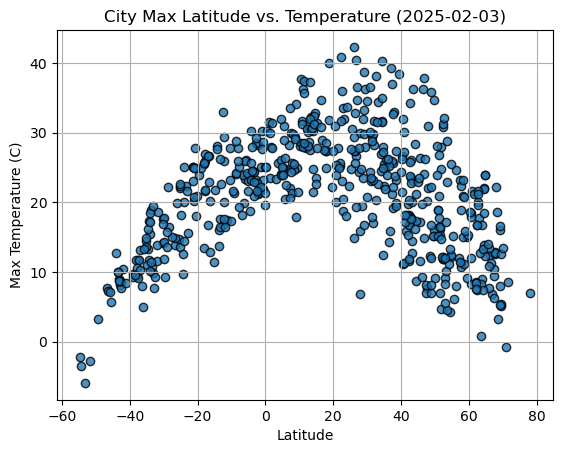

In [ ]:
# Build scatter plot for latitude vs. temperature
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

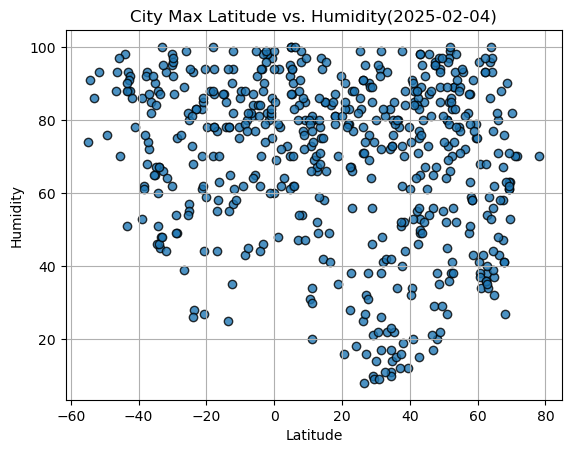

In [ ]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Humidity(%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

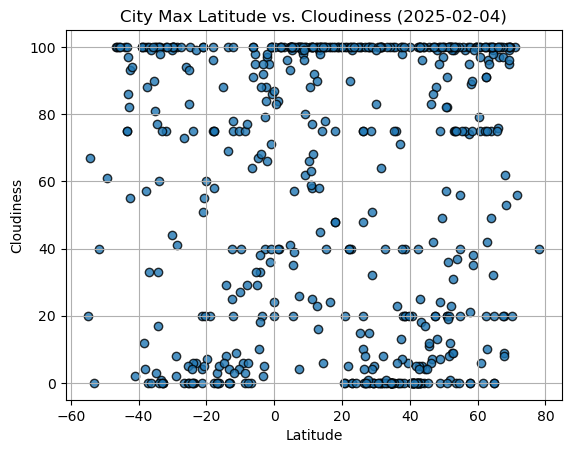

In [ ]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
    label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Cloudiness (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)
# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

---

## Requirement 2: Compute Linear Regression for Each Relationship


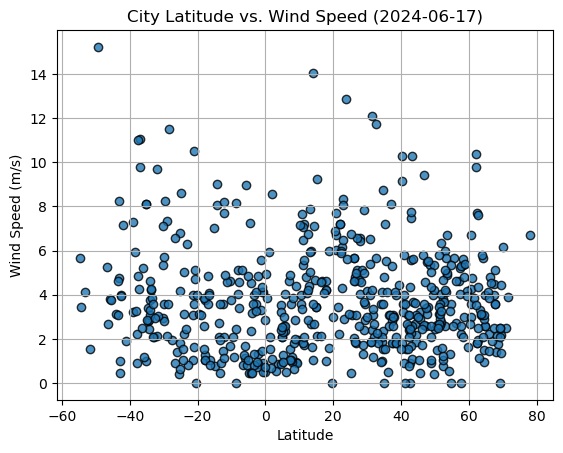

In [ ]:
plt.scatter(
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o",
    alpha=0.8,
  
  
     label="Cities"
)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Wind Speed (%s)" % time.strftime("%Y-%m-%d"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

In [ ]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):

    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    plt.title(f"Latitude vs {title}")
    print(f"The r^2-value is: {rvalue**2}")
    plt.show()


In [ ]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,ginir,7.1333,40.7000,22.08,47,100,1.53,ET,1718607742
3,bam,29.1060,58.3570,38.66,10,0,7.82,IR,1718607769
4,marrakesh,31.6315,-8.0083,17.04,72,0,3.09,MA,1718607770
6,machico,32.7000,-16.7667,20.40,81,40,5.66,PT,1718607772
8,howrah,22.5892,88.3103,36.00,67,40,6.17,IN,1718607544


In [ ]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]



# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kerikeri,-35.2268,173.9474,14.39,90,100,0.98,NZ,1718607765
2,margaret river,-33.9500,115.0667,15.44,67,60,3.76,AU,1718607768
5,waitangi,-43.9535,-176.5597,12.68,98,100,3.13,NZ,1718607771
7,port lincoln,-34.7333,135.8667,13.27,67,100,3.38,AU,1718607773
9,leava,-14.3000,-178.1667,28.10,85,8,8.07,WF,1718607775


###  Temperature vs. Latitude Linear Regression Plot

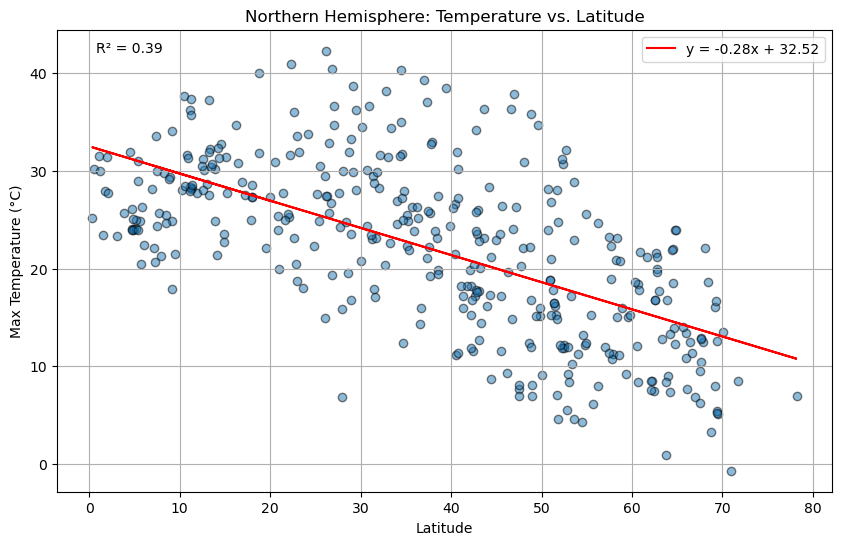

In [ ]:

# Northern Hemisphere - Temperature vs. Latitude Linear Regression
def plot_temp_regression_north():
    """
    Creates a linear regression plot for Temperature vs. Latitude in Northern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df['Lat'], 
        northern_hemi_df['Max Temp']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * northern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                alpha=0.5, edgecolor='black')
    plt.plot(northern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Northern Hemisphere: Temperature vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (°C)')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_north()
plt.show()

The r^2-value is: 0.6720220238897325


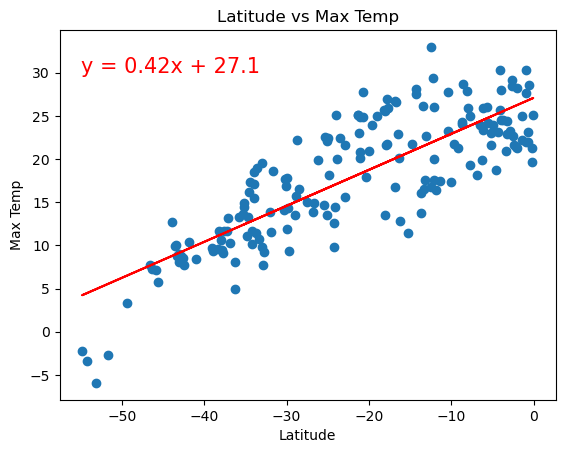

In [ ]:


# Northern Hemisphere - Temperature vs. Latitude Linear Regression
def plot_temp_regression_south():
    """
    Creates a linear regression plot for Temperature vs. Latitude in Northern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df['Lat'], 
        southern_hemi_df['Max Temp']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * southern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], 
                alpha=0.5, edgecolor='black')
    plt.plot(northern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Northern Hemisphere: Temperature vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temperature (°C)')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_south()
plt.show()

There is a strong positive correlation between the temperature and the latitude in the Northern Hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

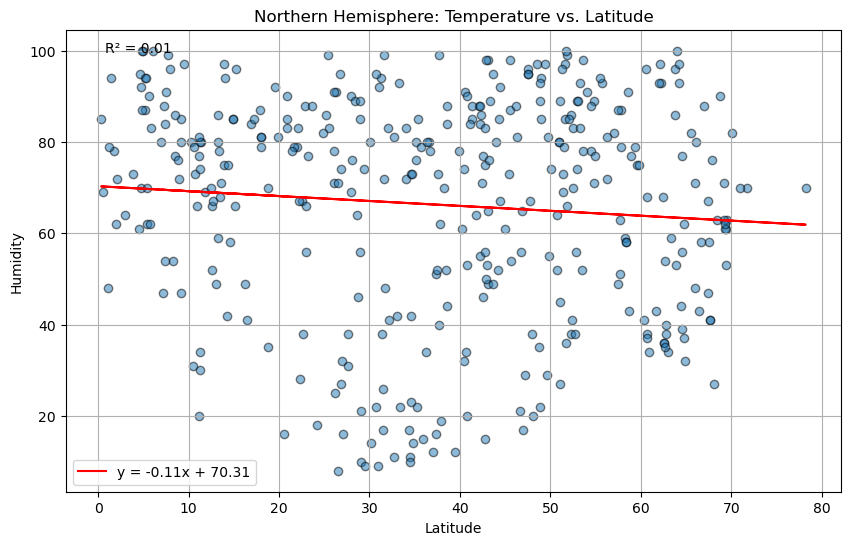

In [ ]:
def plot_humidity_regression_north():
    """
    Creates a linear regression plot for Temperature vs. Latitude in Northern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df['Lat'], 
        northern_hemi_df['Humidity']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * northern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], 
                alpha=0.5, edgecolor='black')
    plt.plot(northern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Northern Hemisphere: Temperature vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('Humidity')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_humidity_regression_north()
plt.show()

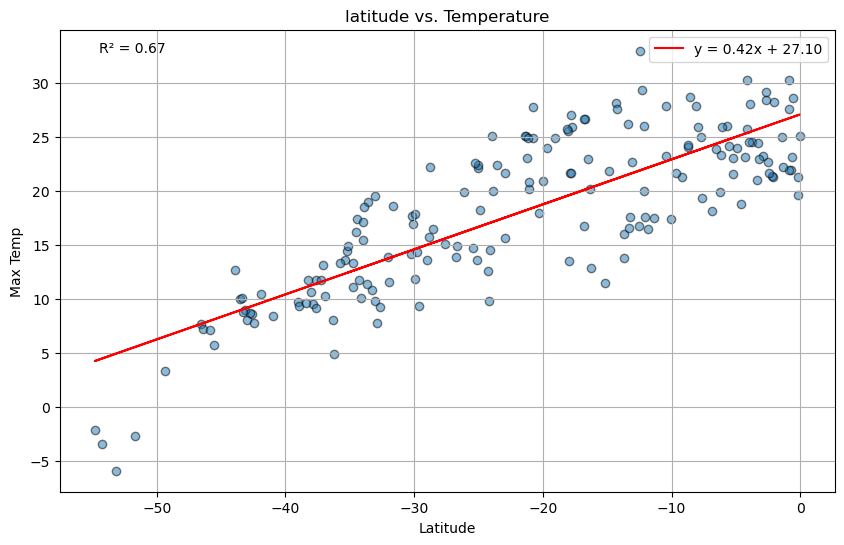

In [ ]:
def plot_temp_regression_south():
    """
    Creates a linear regression plot for Temperature vs. Latitude in Northern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df['Lat'], 
        southern_hemi_df['Max Temp']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * southern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], 
                alpha=0.5, edgecolor='black')
    plt.plot(southern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Southern Hemisphere: Temperature vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('Max Temp')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_south()
plt.title("latitude vs. Temperature")
plt.show()

There is a strong positive correlation between the temperature and the latitude in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

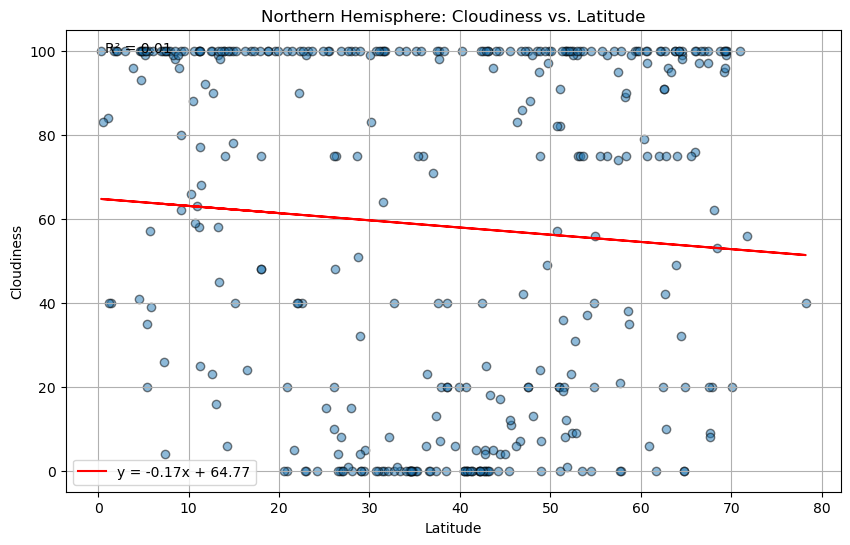

In [ ]:
# Northern Hemisphere
def plot_temp_regression_north():
    """
    Creates a linear regression plot for Cloudiness vs. Latitude in Northern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        northern_hemi_df['Lat'], 
        northern_hemi_df['Cloudiness']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * northern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], 
                alpha=0.5, edgecolor='black')
    plt.plot(northern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Northern Hemisphere: Cloudiness vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('Cloudiness')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_north()
plt.show()

The r^2-value is: 0.018616831531634456


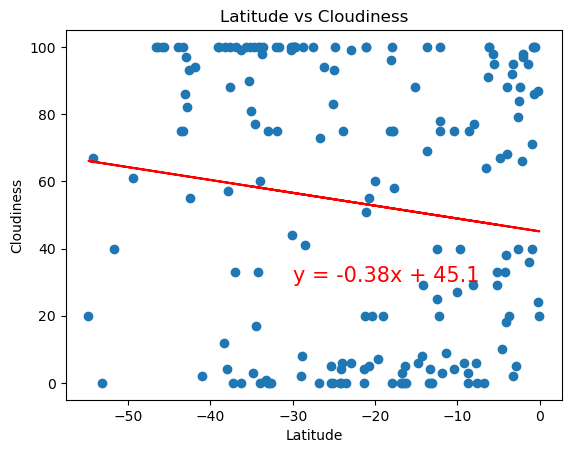

In [ ]:
def plot_temp_regression_south():
    """
    Creates a linear regression plot for Temperature vs. Latitude in Southern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df['Lat'], 
        southern_hemi_df['Cloudiness']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * southern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(southern_hemi_df['Lat'], northern_hemi_df['Max Temp(C)'], 
                alpha=0.5, edgecolor='black')
    plt.plot(southern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Southern Hemisphere: Cloudiness vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('C')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_south()
plt.show()

There is a weak negative correlation between cloudiness and latitude in the Southern Hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

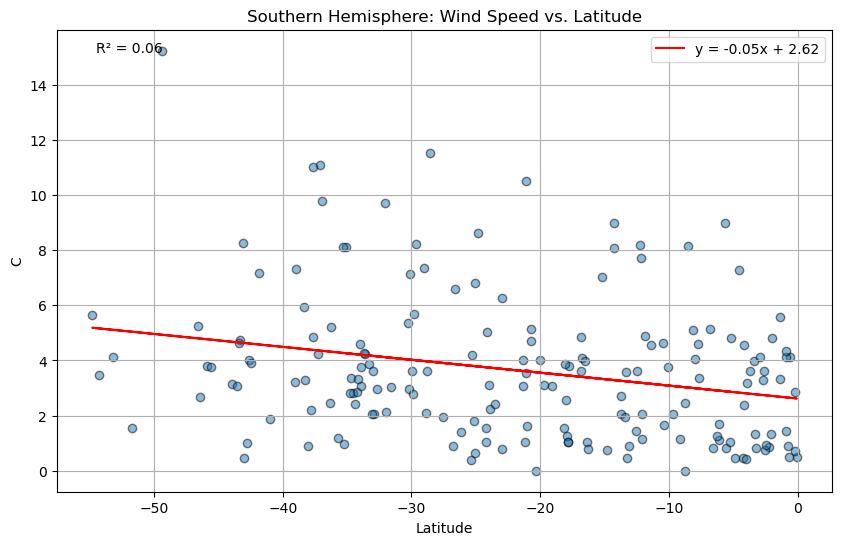

In [ ]:
def plot_temp_regression_south():
    """
    Creates a linear regression plot for Wind Speed vs. Latitude in Southern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df['Lat'], 
        southern_hemi_df['Wind Speed']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * southern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                alpha=0.5, edgecolor='black')
    plt.plot(southern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('C')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_south()
plt.show()

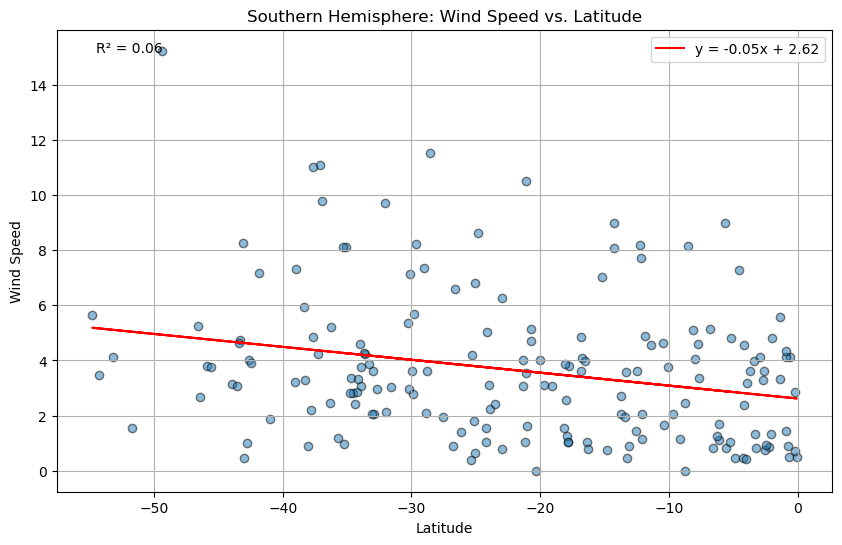

In [64]:
def plot_temp_regression_south():
    """
    Creates a linear regression plot for Wind Speed vs. Latitude in Southern Hemisphere
    Returns the R-value and regression equation
    """
    # Create the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(
        southern_hemi_df['Lat'], 
        southern_hemi_df['Wind Speed']
    )
 
    # Calculate regression values for plotting
    regress_values = slope * southern_hemi_df['Lat'] + intercept
 
    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], 
                alpha=0.5, edgecolor='black')
    plt.plot(southern_hemi_df['Lat'], regress_values, color='red', 
             label=f'y = {slope:.2f}x + {intercept:.2f}')
 
    # Add labels and title
    plt.title('Southern Hemisphere: Wind Speed vs. Latitude')
    plt.xlabel('Latitude')
    plt.ylabel('Wind Speed')
    plt.grid(True)
    plt.legend()
 
    # Add R-squared value
    plt.text(0.05, 0.95, f'R² = {r_value**2:.2f}', 
             transform=plt.gca().transAxes)
 
    return r_value**2, f'y = {slope:.2f}x + {intercept:.2f}'
 
# Run the function
r_squared_n, equation_n = plot_temp_regression_south()
plt.show()

There is a moderate negative correlation between the wind speed and the latitude. The smaller the wind speed, the greater the latitude in the Southern Hemisphere. 